## Lending club and national climate data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
data_statement_path = "D:/archive (8)/LCDataDictionary.xlsx"

data_dict = pd.read_excel(data_statement_path)

data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [3]:
#Feature의 개수는 151개 
data_dict.sample

<bound method NDFrame.sample of                LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
148      settlement_amount  The loan amount that the borrower has agreed t...
149  settlement_percentage  The settlement amount as a percentage of the p...
150        settlement_term  The number of months that the borrower will be...
151                    NaN                                                NaN
152                    NaN  * Employer Title replaces Employer Name for al...

[153 rows x 2 columns]>

In [3]:
data_path = "D:/archive (8)/Loan_status_2007-2020Q3.gzip"
loan_data = pd.read_csv(data_path, low_memory=False)

# 데이터 확인
print(loan_data.head())  # 상위 5개 행 출력
print(loan_data.info())  # 데이터 정보 출력

   Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501     5000.0       5000.0           4975.0   36 months   
1           1  1077430     2500.0       2500.0           2500.0   60 months   
2           2  1077175     2400.0       2400.0           2400.0   36 months   
3           3  1076863    10000.0      10000.0          10000.0   36 months   
4           4  1075358     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_start_date  \
0   10.65%       162.87     B        B2  ...                 NaN   
1   15.27%        59.83     C        C4  ...                 NaN   
2   15.96%        84.33     C        C5  ...                 NaN   
3   13.49%       339.31     C        C1  ...                 NaN   
4   12.69%        67.79     B        B5  ...                 NaN   

  hardship_end_date payment_plan_start_date  hardship_length hardship_dpd  \
0               NaN                    

In [4]:
# Observing some general information about the dataset
display(loan_data.sample(3),loan_data.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 142 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    Unnamed: 0                                  2925493 non-null  int64  
 1    id                                          2925493 non-null  object 
 2    loan_amnt                                   2925492 non-null  float64
 3    funded_amnt                                 2925492 non-null  float64
 4    funded_amnt_inv                             2925492 non-null  float64
 5    term                                        2925492 non-null  object 
 6    int_rate                                    2925492 non-null  object 
 7    installment                                 2925492 non-null  float64
 8    grade                                       2925492 non-null  object 
 9    sub_grade                                   

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
1875925,8164,67849513,8125.0,8125.0,8125.0,36 months,9.76%,261.26,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2490694,67951,77229990,15000.0,15000.0,15000.0,60 months,10.75%,324.27,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1372088,14931,163555823,10800.0,10800.0,10800.0,60 months,15.24%,258.30,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


None

In [5]:
##loan_data type이 각각 몇개가 있는 지 확인
loan_data.dtypes.value_counts()

float64    106
object      35
int64        1
Name: count, dtype: int64

In [6]:
loan_data["loan_status"].value_counts()

loan_status
Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: count, dtype: int64

C:\Users\ksmin\AppData\Local\Temp\ipykernel_1660\3484818109.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(loan_status_counts.index, rotation=45, ha='right')


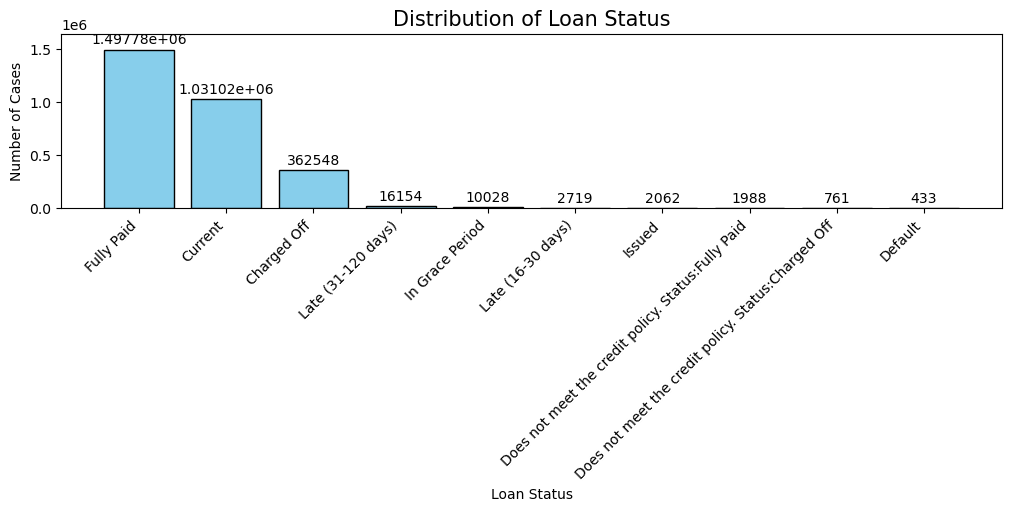

In [7]:
import matplotlib.pyplot as plt

# loan_status 값 개수 계산 (그룹화 없이 원본 값 그대로 사용)
loan_status_counts = loan_data['loan_status'].value_counts()

# 막대그래프 그리기
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
bars = ax.bar(loan_status_counts.index, loan_status_counts.values, color='skyblue', edgecolor='black')

# 막대 위에 레이블 추가
ax.bar_label(bars, padding=2)

# 축 설정
ax.set_ylabel('Number of Cases', fontsize=10)
ax.set_xlabel('Loan Status', fontsize=10)
ax.set_title('Distribution of Loan Status', fontsize=15)
ax.set_xticklabels(loan_status_counts.index, rotation=45, ha='right')

# y축 범위 설정
ax.set_ylim(0, max(loan_status_counts.values) * 1.1)

# 그래프 출력
plt.show()


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [9]:
loan_data['loan_status'].value_counts()

data = loan_data.copy()
dataset = loan_data.copy()

## Data Analysis
- dataset을 바탕으로 각각의 feature들에 대한 정보, Missing value, outlier 분석해보기
- 각각의 value값들 비율 확인해보기

In [10]:
#Unnamed: 0 feature drop
dataset = dataset.drop(columns='Unnamed: 0')
dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [11]:
## Missing value 비율
missing_ratios = dataset.isnull().sum()/len(dataset)*100

print("Missing value ratio")
print(missing_ratios[missing_ratios>0].sort_values(ascending=False).head(20))

Missing value ratio
hardship_loan_status                          95.097886
hardship_reason                               95.090332
hardship_status                               95.090229
hardship_dpd                                  95.090161
payment_plan_start_date                       95.090127
hardship_start_date                           95.090127
hardship_end_date                             95.090127
deferral_term                                 95.090127
hardship_length                               95.090127
hardship_type                                 95.090127
orig_projected_additional_accrued_interest    93.873169
hardship_payoff_balance_amount                93.776228
hardship_amount                               93.776228
hardship_last_payment_amount                  93.776228
sec_app_revol_util                            93.348574
verification_status_joint                     93.341738
revol_bal_joint                               93.237960
sec_app_collections_12_mths_

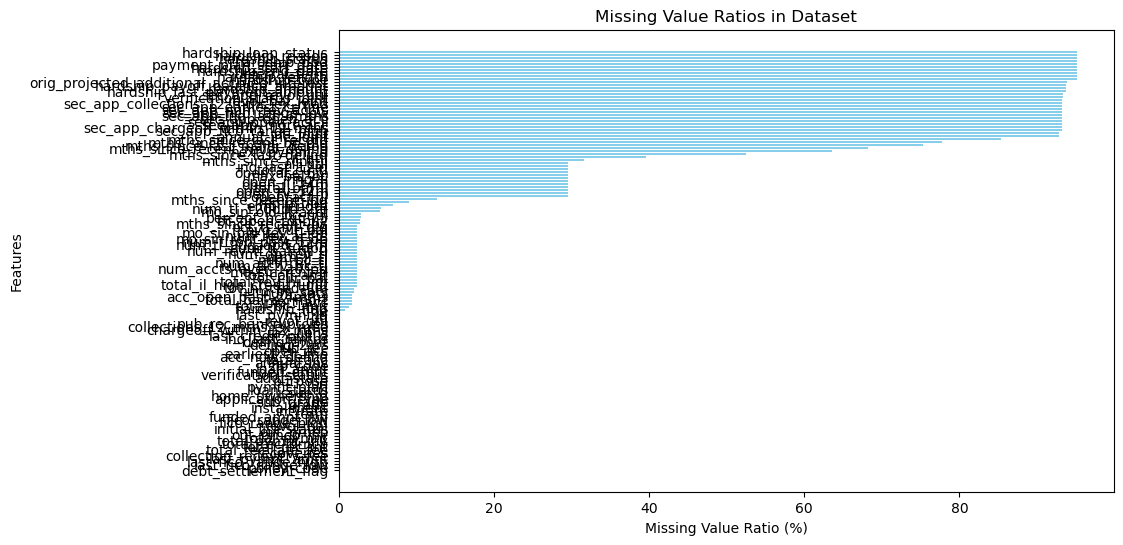

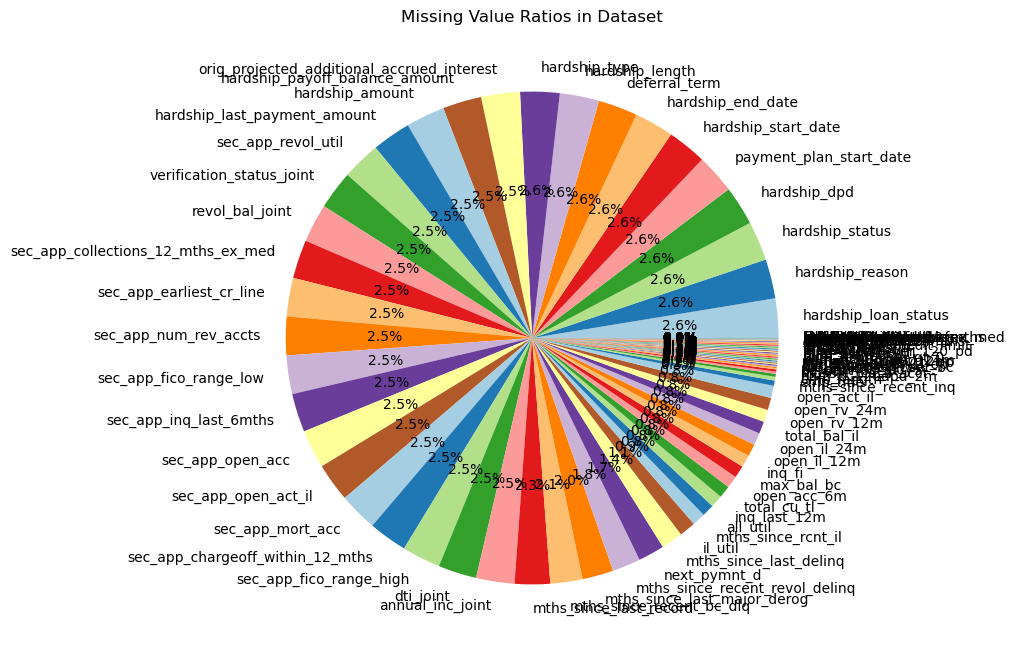

In [12]:
##전체적인 missing value

# 각 feature의 결측치 비율 계산
missing_ratios = dataset.isnull().sum() / len(dataset) * 100

# 결측치가 있는 feature만 필터링하여 정렬
missing_ratios = missing_ratios[missing_ratios > 0].sort_values(ascending=False)

# Bar Chart (막대 그래프)
plt.figure(figsize=(10, 6))
plt.barh(missing_ratios.index, missing_ratios, color='skyblue')
plt.xlabel("Missing Value Ratio (%)")
plt.ylabel("Features")
plt.title("Missing Value Ratios in Dataset")
plt.gca().invert_yaxis()  # y축 뒤집기 (비율이 높은 순서대로 보기 좋게)
plt.show()

# Pie Chart (파이 차트)
plt.figure(figsize=(8, 8))
plt.pie(missing_ratios, labels=missing_ratios.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Missing Value Ratios in Dataset")
plt.show()


In [13]:
## missing value가 80퍼센트가 넘는 feature들 뽑기 
high_missing_features = missing_ratios[missing_ratios>80]

print(f"The number of features that have missing value ratio more than 80% : {len(high_missing_features)}")
print(high_missing_features)

The number of features that have missing value ratio more than 80% : 30
hardship_loan_status                          95.097886
hardship_reason                               95.090332
hardship_status                               95.090229
hardship_dpd                                  95.090161
payment_plan_start_date                       95.090127
hardship_start_date                           95.090127
hardship_end_date                             95.090127
deferral_term                                 95.090127
hardship_length                               95.090127
hardship_type                                 95.090127
orig_projected_additional_accrued_interest    93.873169
hardship_payoff_balance_amount                93.776228
hardship_amount                               93.776228
hardship_last_payment_amount                  93.776228
sec_app_revol_util                            93.348574
verification_status_joint                     93.341738
revol_bal_joint                 

In [14]:
#대출자가 경제적인 어려움을 가질 때 대출 현황
dataset["hardship_loan_status"].value_counts()

hardship_loan_status
ACTIVE                116333
GRACE_CURRENT          11647
Late (16-30 days)       4371
INCOLLECTION            3538
In Grace Period         2632
Current                 2271
DELINQUENT              1451
CURRENT                  721
Late (31-120 days)       419
Issued                    13
PIPELINE                   7
OTHER                      5
ISSUED                     2
CLOSED                     1
Name: count, dtype: int64

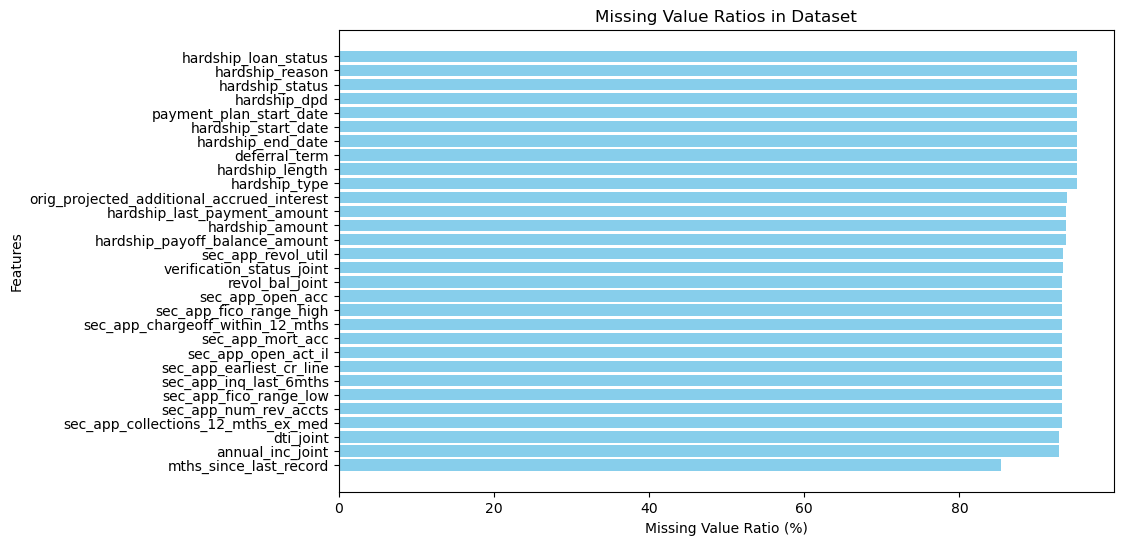

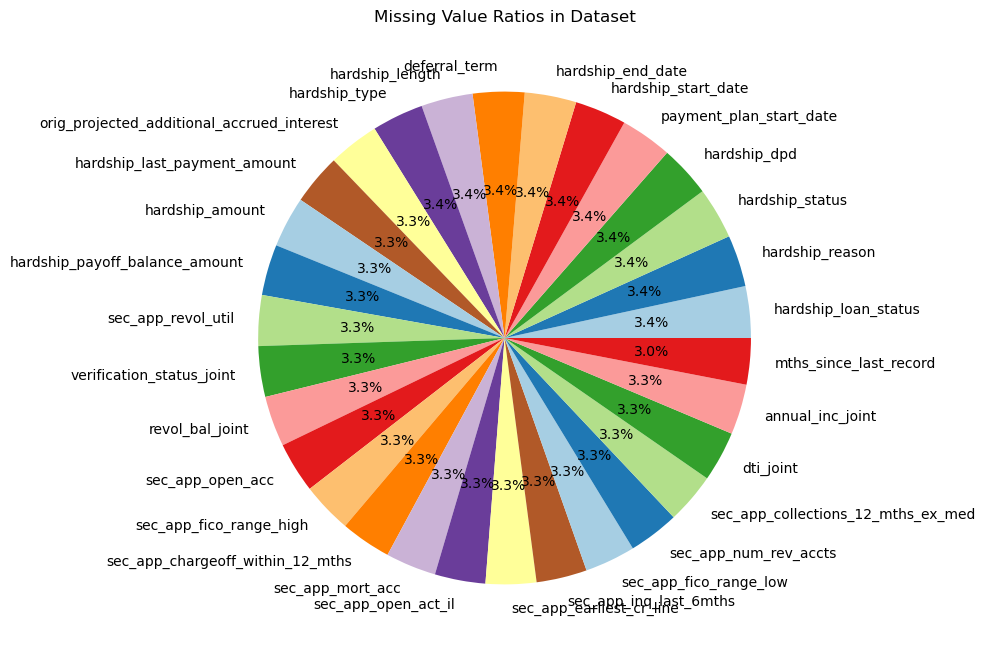

In [15]:
## 상위 20개만 추린다
top_20_missing_ratios = missing_ratios[missing_ratios>0].sort_values(ascending=False).head(30)

# Bar Chart (막대 그래프)
plt.figure(figsize=(10, 6))
plt.barh(top_20_missing_ratios.index, top_20_missing_ratios, color='skyblue')
plt.xlabel("Missing Value Ratio (%)")
plt.ylabel("Features")
plt.title("Missing Value Ratios in Dataset")
plt.gca().invert_yaxis()  # y축 뒤집기 (비율이 높은 순서대로 보기 좋게)
plt.show()

# Pie Chart (파이 차트)
plt.figure(figsize=(8, 8))
plt.pie(top_20_missing_ratios, labels=top_20_missing_ratios.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Missing Value Ratios in Dataset")
plt.show()

In [ ]:
"""##Outlier를 찾는다. 각각 10개의 features씩 Boxplot을 하고 subplot을 14개 보여줄 수 있는 그림

# 숫자형 컬럼만 선택 (Outlier 분석 대상)
numerical_columns = dataset.select_dtypes(include=[np.number]).columns

# subplot 개수 및 feature 그룹 설정
num_features_per_plot = 10  # 한 subplot에 10개의 feature 포함
num_subplots = 14           # 총 14개의 subplot 생성

# Figure 및 subplot 생성
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, num_subplots * 4))

# 각 subplot에 Boxplot 추가
for i in range(num_subplots):
    start_idx = i * num_features_per_plot
    end_idx = start_idx + num_features_per_plot
    selected_features = numerical_columns[start_idx:end_idx]
    
    if len(selected_features) == 0:
        break  # 더 이상 feature가 없으면 중단

    dataset[selected_features].boxplot(ax=axes[i])
    axes[i].set_title(f'Boxplot of Features {start_idx + 1} to {end_idx}')
    axes[i].tick_params(axis='x', rotation=45)  # X축 레이블 회전

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()
"""

In [16]:
## 동일 ID 있는 지 Check
duplicated_ids = dataset[dataset.duplicated(subset=['id'], keep=False)]

if not duplicated_ids.empty:
    print(duplicated_ids)
else:
    print("There is no duplicated ids")

There is no duplicated ids


In [ ]:
"""for col in dataset.columns:
    print(col)"""

id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_l

In [17]:
## int_rate, revol_util type 확인
display(dataset[['int_rate','revol_util']].head())
print(type(dataset[['int_rate']].iloc[0][0]))
print(type(dataset[['revol_util']].iloc[0][0]))

,int_rate,revol_util
0,10.65%,83.7%
1,15.27%,9.4%
2,15.96%,98.5%
3,13.49%,21%
4,12.69%,53.9%


<class 'str'>
<class 'str'>


C:\Users\ksmin\AppData\Local\Temp\ipykernel_1660\4035530366.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(type(dataset[['int_rate']].iloc[0][0]))
C:\Users\ksmin\AppData\Local\Temp\ipykernel_1660\4035530366.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(type(dataset[['revol_util']].iloc[0][0]))


In [18]:
#퍼센트를 float형태로 바꾸기
def converting_cat_to_num(x):
    if not isinstance(x,str):
        return x  
    return float(x.split("%")[0].lstrip())

# Converting numerically data stored as categorical
dataset['int_rate'] = dataset['int_rate'].map(converting_cat_to_num)
dataset['revol_util'] = dataset['revol_util'].map(converting_cat_to_num)

print("Successfully converted!")
display(dataset[['int_rate','revol_util']].head())

Successfully converted!


,int_rate,revol_util
0,10.65,83.7
1,15.27,9.4
2,15.96,98.5
3,13.49,21.0
4,12.69,53.9


In [19]:
#dataset zip_code
dataset["zip_code"].head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [20]:
#zip code 뒤에 x 2개 빼고 float형 변환
def filter_zip_code(x):
    if not isinstance(x,str):
        return x
    return int(x[0:-2])


# Filtering the zip code
dataset["zip_code"] = dataset["zip_code"].map(filter_zip_code)

print("Successfully converted!")
display(dataset[['zip_code']].head())

Successfully converted!


,zip_code
0,860.0
1,309.0
2,606.0
3,917.0
4,972.0


In [21]:
## 시간 데이터 확인
to_data_features = ["issue_d", "earliest_cr_line", "last_pymnt_d", "next_pymnt_d",\
                    "last_credit_pull_d", "sec_app_earliest_cr_line", "hardship_start_date",\
                   "hardship_end_date", "payment_plan_start_date"]

display(dataset[to_data_features].head(10))

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,sec_app_earliest_cr_line,hardship_start_date,hardship_end_date,payment_plan_start_date
0,Dec-2011,Jan-1985,Jan-2015,NaN,May-2020,NaN,NaN,NaN,NaN
1,Dec-2011,Apr-1999,Apr-2013,NaN,Oct-2016,NaN,NaN,NaN,NaN
2,Dec-2011,Nov-2001,Jun-2014,NaN,Jun-2017,NaN,NaN,NaN,NaN
3,Dec-2011,Feb-1996,Jan-2015,NaN,Apr-2016,NaN,NaN,NaN,NaN
4,Dec-2011,Jan-1996,Jan-2017,NaN,Apr-2018,NaN,NaN,NaN,NaN
5,Dec-2011,Nov-2004,Jan-2015,NaN,Feb-2017,NaN,NaN,NaN,NaN
6,Dec-2011,Jul-2005,May-2016,NaN,Nov-2019,NaN,NaN,NaN,NaN
7,Dec-2011,Jan-2007,Jan-2015,NaN,Dec-2014,NaN,NaN,NaN,NaN
8,Dec-2011,Apr-2004,Apr-2012,NaN,Oct-2016,NaN,NaN,NaN,NaN
9,Dec-2011,Sep-2004,Nov-2012,NaN,Dec-2016,NaN,NaN,NaN,NaN


In [22]:
import numpy as np

enum = {'Jan':"01", 'Feb':"02", 'Mar':"03", 
        'Apr':"04", 'May':"05", 'Jun':"06",
        'Jul':"07", 'Aug':"08", 
        'Sep':"09", 'Oct':"10", 
        'Nov':"11", 'Dec':"12"}

def to_data_tranfromer(x):
    if not isinstance(x, str):
        return np.nan
    date = x.split('-')
    if len(date) != 2:
        return np.nan  # 예상치 못한 포맷 처리
    month, year = date[0], date[1]
    return int(year + enum.get(month, "00"))  # "YYYYMM" 형식으로 변환

# 각 feature에 적용
for name in to_data_features:
    dataset[name] = dataset[name].map(to_data_tranfromer)

print("Successfully converted!")
display(dataset[to_data_features].head(10))


Successfully converted!


,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,sec_app_earliest_cr_line,hardship_start_date,hardship_end_date,payment_plan_start_date
0,201112.0,198501.0,201501.0,NaN,202005.0,NaN,NaN,NaN,NaN
1,201112.0,199904.0,201304.0,NaN,201610.0,NaN,NaN,NaN,NaN
2,201112.0,200111.0,201406.0,NaN,201706.0,NaN,NaN,NaN,NaN
3,201112.0,199602.0,201501.0,NaN,201604.0,NaN,NaN,NaN,NaN
4,201112.0,199601.0,201701.0,NaN,201804.0,NaN,NaN,NaN,NaN
5,201112.0,200411.0,201501.0,NaN,201702.0,NaN,NaN,NaN,NaN
6,201112.0,200507.0,201605.0,NaN,201911.0,NaN,NaN,NaN,NaN
7,201112.0,200701.0,201501.0,NaN,201412.0,NaN,NaN,NaN,NaN
8,201112.0,200404.0,201204.0,NaN,201610.0,NaN,NaN,NaN,NaN
9,201112.0,200409.0,201211.0,NaN,201612.0,NaN,NaN,NaN,NaN


In [23]:
## purpose,title 문장 데이터 삭제
delete_features = ['purpose', 'title']

dataset.drop(labels = delete_features, axis =1, inplace=True)

In [24]:
# Analyzing the numerical data generally
number_of_missing_values = {}
percentage_of_missing_values = {}
number_of_duplicate_elements = {}
ratio_of_duplicates = {}

# Check columns
columns_name_to_check = dataset.columns
columns_name_to_check = columns_name_to_check.drop("loan_status")

# Calculating
for name in columns_name_to_check:
    number_of_nulls = dataset[name].isnull().sum()
    number_of_missing_values[name] = number_of_nulls
    percentage_of_missing_values[name] = (number_of_nulls/len(dataset[name]))*100
    
for name in columns_name_to_check:
    number_of_duplicate_elements[name] = (dataset[name].count() - dataset[name].nunique())

for name in columns_name_to_check:
    ratio_of_duplicates[name] = number_of_duplicate_elements[name]/dataset[name].count()    

# Restructuring the Gathered Information
reassemble_data = {
                  "Attribute Names" : list(ratio_of_duplicates.keys()),
                  "Number of Missing Values" : list(number_of_missing_values.values()),
                  "Missing Values %" : list(percentage_of_missing_values.values()),
                  "Number of Duplicates" : list(number_of_duplicate_elements.values()),
                  "Ratio of Duplicates" : list(ratio_of_duplicates.values())
                  }

statistics_about_data =  pd.DataFrame(reassemble_data)

# Visualizing the Data
statistics_sorted = statistics_about_data.sort_values(by = 'Missing Values %') 
statistics_sorted.style.set_properties(subset=['Attribute Names'], **{'font-weight': 'bold'})\
.background_gradient(axis=0) #subset='Number of Duplicates')

,Attribute Names,Number of Missing Values,Missing Values %,Number of Duplicates,Ratio of Duplicates
0,id,0,0.000000,0,0.000000
29,revol_bal,1,0.000034,2812158,0.961260
32,initial_list_status,1,0.000034,2925490,0.999999
33,out_prncp,1,0.000034,2392896,0.817947
34,out_prncp_inv,1,0.000034,2385754,0.815505
35,total_pymnt,1,0.000034,857552,0.293131
36,total_pymnt_inv,1,0.000034,1353612,0.462696
37,total_rec_prncp,1,0.000034,2293097,0.783833
23,fico_range_high,1,0.000034,2925444,0.999984
38,total_rec_int,1,0.000034,2197524,0.751164


In [25]:
unique_key_attributes = [statistics_sorted.loc[(statistics_sorted["Ratio of Duplicates"] == 0.0)]["Attribute Names"]]
features_to_deleat = []

# Adding features that are unique for every instance
for name in unique_key_attributes:
    features_to_deleat.append(unique_key_attributes[0].iloc[0])

# Adding features that have only 1 class    
for i in dataset.columns:
    if len(dataset[i].value_counts()) == 1:
        features_to_deleat.append(i)
        
print(f"List of features that need to be deleted: {features_to_deleat}")
        

# Droping the features that are unique or different for every instance
for name in features_to_deleat:
    dataset.drop(labels=name,axis=1,inplace=True,errors = 'ignore')
    statistics_sorted.drop(labels=name,axis=1,inplace=True,errors = 'ignore')

print("\nUninformative features have been deleted successfully!")

List of features that need to be deleted: ['id', 'pymnt_plan', 'policy_code']

Uninformative features have been deleted successfully!


In [26]:
#Missing value ratio가 5를 넘어가는 것들은 모두 drop
features_to_remove = list(statistics_sorted.loc[(statistics_sorted["Missing Values %"] > 5)]["Attribute Names"])
print(f"List of features that need to be removed: {len(features_to_remove)}")

for  name in features_to_remove:
    dataset.drop(labels=name, axis=1, inplace=True)

print("Non-high presence features have been deleted successfully!")

List of features that need to be removed: 54
Non-high presence features have been deleted successfully!


In [27]:
#URL feature 지우기
dataset.drop(labels="url", axis=1, inplace=True)

In [28]:
#이렇게 지우고 나면 dataset.columns의 개수는 81개가 된다.
len(dataset.columns)

81

In [29]:
#불필요한 변수 삭제 후 메모리 확보
del columns_name_to_check, number_of_missing_values, percentage_of_missing_values, number_of_duplicate_elements, ratio_of_duplicates

In [30]:
##남은 데이터셋에서 Outlier 확인하기.
dataset.dtypes.value_counts()

float64    70
object     11
Name: count, dtype: int64

In [31]:
object_features = dataset.select_dtypes(include=['object']).columns

for col in object_features:
    if col == 'loan_status':
        continue
    else:
        print(col, '\n', dataset[col].unique(), '\n')

term 
 [' 36 months' ' 60 months' nan] 

grade 
 ['B' 'C' 'A' 'E' 'F' 'D' 'G' nan] 

sub_grade 
 ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5' nan] 

home_ownership 
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' nan 'ANY'] 

verification_status 
 ['Verified' 'Source Verified' 'Not Verified' nan] 

addr_state 
 ['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME' nan 'ND'] 

initial_list_status 
 ['f' nan 'w'] 

application_type 
 ['Individual' nan 'Joint App'] 

hardship_flag 
 ['N' nan 'Y'] 

debt_settlement_flag 
 ['N' 'Y' nan] 



In [32]:
## boxplot 시각화를 통한 데이터 분석
dataset['application_type'].value_counts()

application_type
Individual    2714979
Joint App      210513
Name: count, dtype: int64

In [48]:
dataset['total_rec_prncp'].value_counts()

total_rec_prncp
10000.00    118032
12000.00     81060
20000.00     79122
15000.00     79032
5000.00      59435
             ...  
9469.82          1
6440.01          1
3558.41          1
5163.11          1
4706.14          1
Name: count, Length: 632395, dtype: int64

In [41]:
dataset['total_pymnt_inv'].value_counts()

total_pymnt_inv
0.00        4108
10838.35     450
16257.53     341
21676.72     314
13006.03     306
            ... 
33386.58       1
13193.23       1
10803.73       1
10694.24       1
12685.64       1
Name: count, Length: 1571880, dtype: int64

In [50]:
dataset['last_fico_range_high'].value_counts()

last_fico_range_high
709.0    102910
694.0    101846
704.0    101691
699.0    101418
714.0    101232
          ...  
834.0      5349
839.0      2603
844.0      1407
850.0       557
0.0         212
Name: count, Length: 72, dtype: int64

In [51]:
dataset['recoveries'].value_counts()

recoveries
0.00       2660243
150.00        1158
100.00        1031
50.00          977
200.00         900
            ...   
6718.75          1
2771.63          1
182.04           1
1819.13          1
4253.43          1
Name: count, Length: 175479, dtype: int64

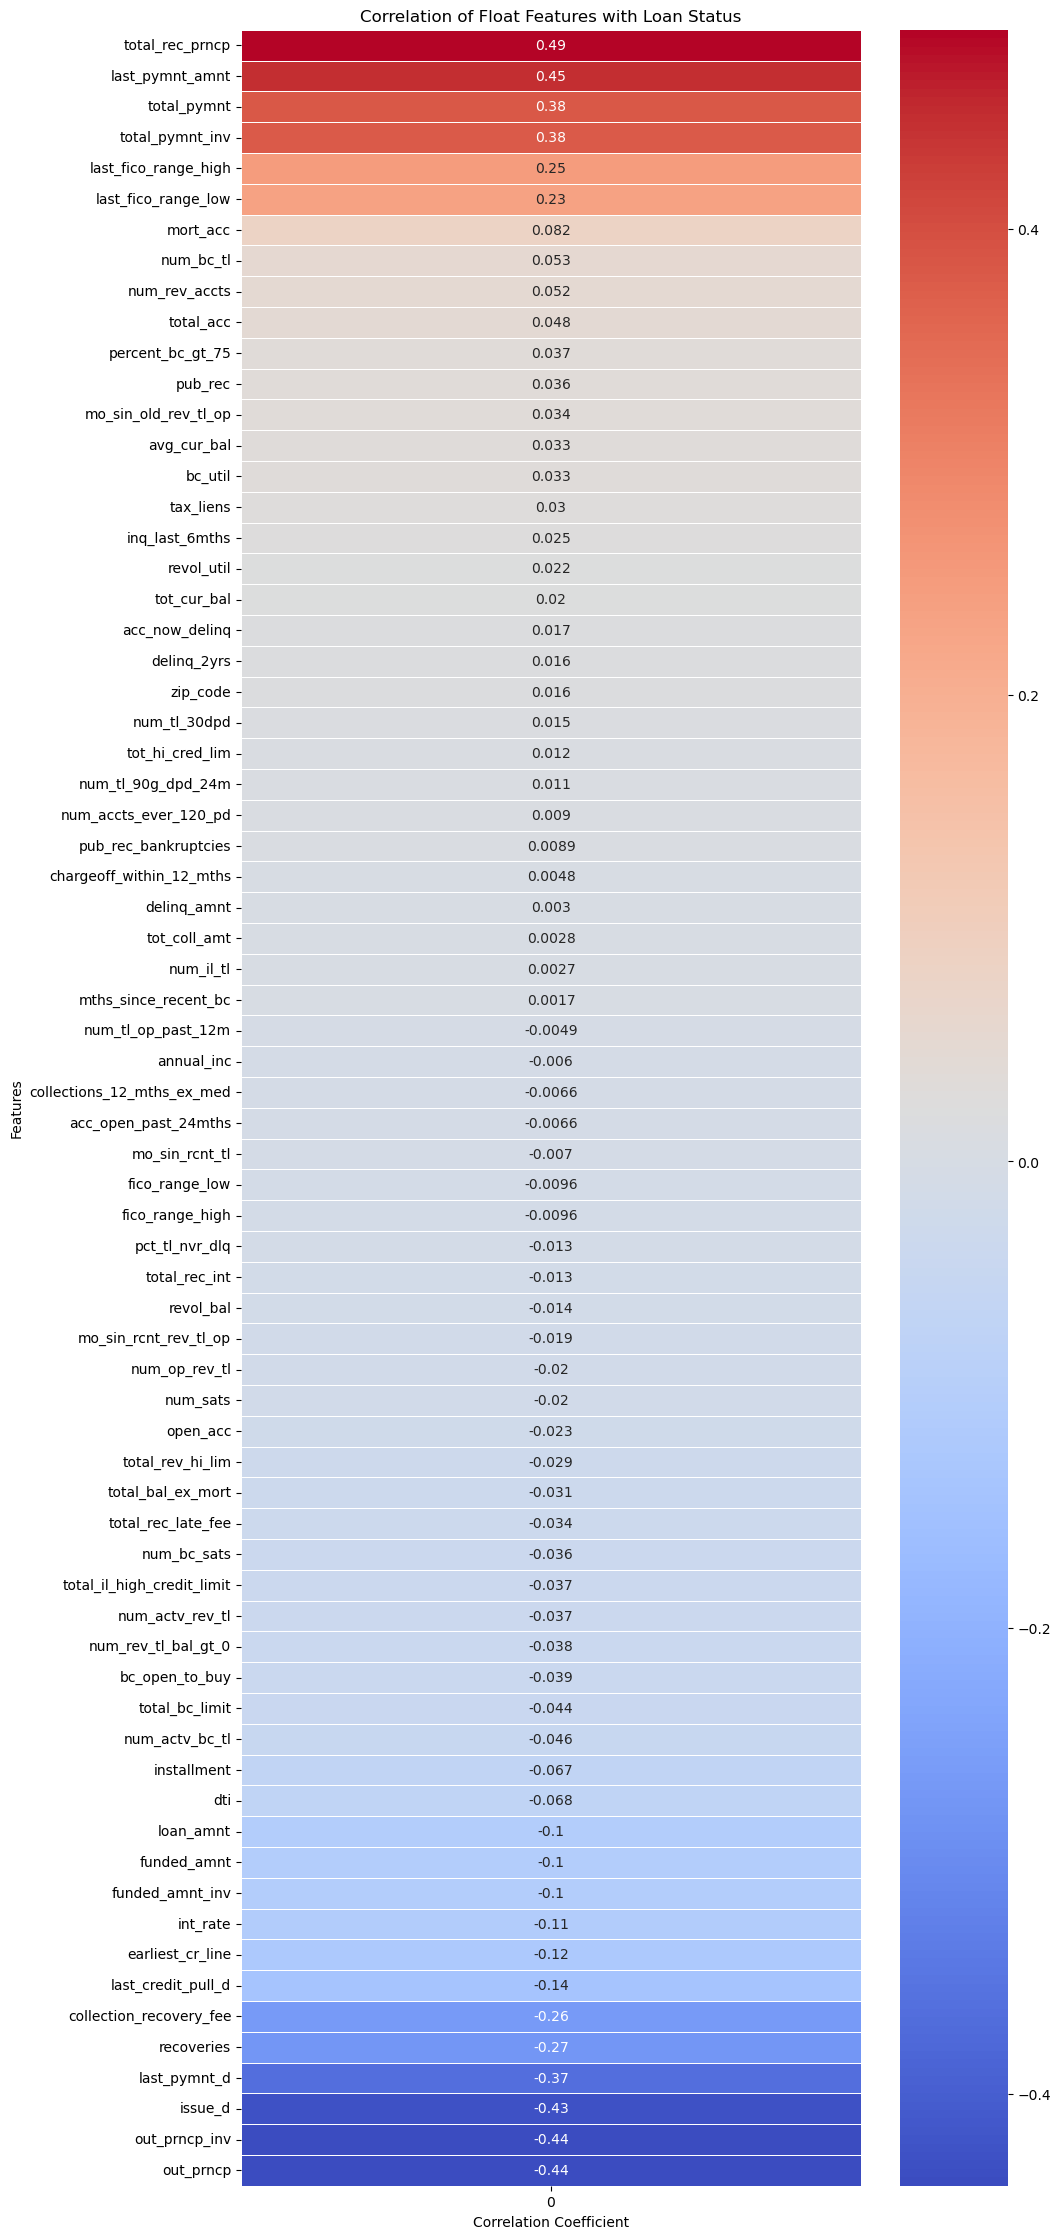

In [47]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
##float형 중에서 loan_status에 가장 영향이 큰 거 찾는다
dataset.dtypes.value_counts()

dataset_features = dataset.select_dtypes(include='float64')

le = LabelEncoder()
dataset['loan_status_encoded'] = le.fit_transform(dataset['loan_status'])
target = 'loan_status_encoded'

correlation_matrix = dataset_features.corrwith(dataset[target]).sort_values(ascending=False)

# 4. heatmap 시각화
plt.figure(figsize=(10, len(correlation_matrix) * 0.4))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Float Features with Loan Status')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

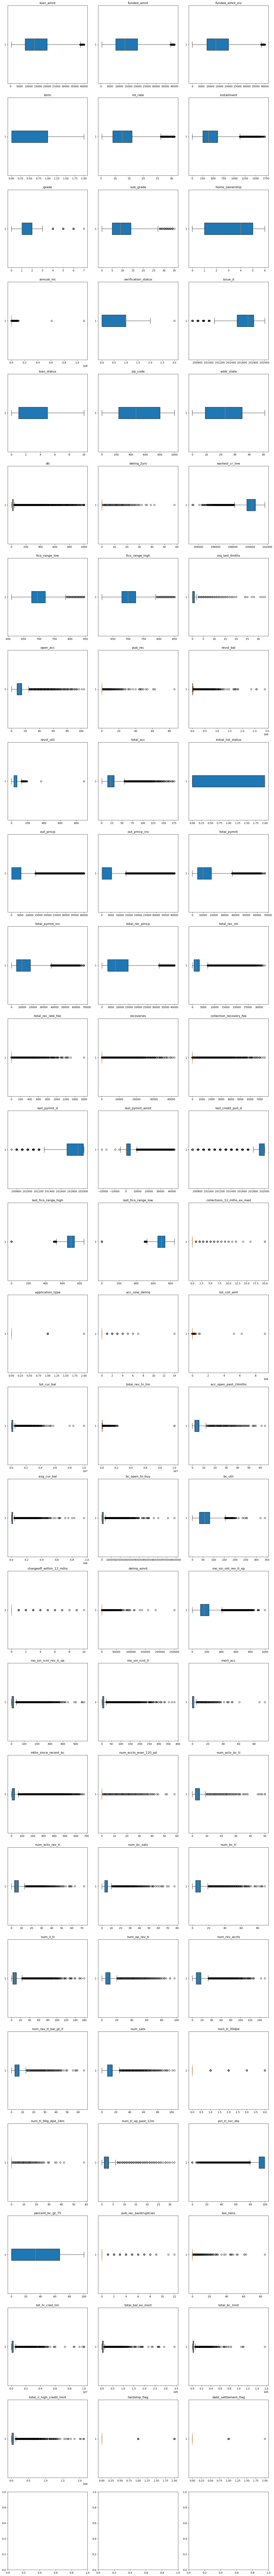

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기 (데이터셋이 이미 로드되어 있다고 가정)
# dataset = pd.read_csv("your_data.csv")

# 🔹 Object 타입(범주형) 데이터 추출
categorical_columns = dataset.select_dtypes(include=['object']).columns

# 🔹 Label Encoding 적용
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col].astype(str))  # NaN 값도 문자열로 변환 후 인코딩
    label_encoders[col] = le  # 나중에 디코딩할 경우 사용 가능

# 🔹 수치형 피처만 선택
numerical_columns = dataset.select_dtypes(include=[np.number]).columns

# 🔹 Boxplot 시각화 (이상치 확인)
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(15, 5 * (len(numerical_columns)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].boxplot(dataset[col].dropna(), vert=False, patch_artist=True)
    axes[i].set_title(col)

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
##데이터를 xgboost tree 기반 feature imfortance를 뽑은 다음 correlation을 통해 feature들의 상관도를 보고 지울 거를 지운다.


## Data Class 나누기
- Fully Paid : 1497783
- Default(Charged Off + Default) : 362981

In [17]:
#loan_data 특정 class만 살리고 Charged off -> Defalut class로 바꾸기기
data = data[data['loan_status'].isin(["Fully Paid", "Charged Off", "Default"])]
print(data['loan_status'].value_counts())

data['loan_status'] = data['loan_status'].replace("Charged Off", "Default")
print('\n',data['loan_status'].value_counts())

loan_status
Fully Paid     1497783
Charged Off     362548
Default            433
Name: count, dtype: int64

 loan_status
Fully Paid    1497783
Default        362981
Name: count, dtype: int64


In [19]:
# For transforming the problem into a binary classification we will encode the target so that it contains only 1, 0, and nan.

mapping = {
    "Fully Paid" : 0,
    "Default" : 1
}


def encoding_target(x):
    if isinstance(x,str):
        return mapping[x]
    return np.nan


# Performing the encoding
data['loan_status'] = data['loan_status'].map(encoding_target)
    
# Droping all irrelevant data
# data.dropna(subset=['loan_status'],inplace=True)

C:\Users\ksmin\AppData\Local\Temp\ipykernel_29868\1991024797.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


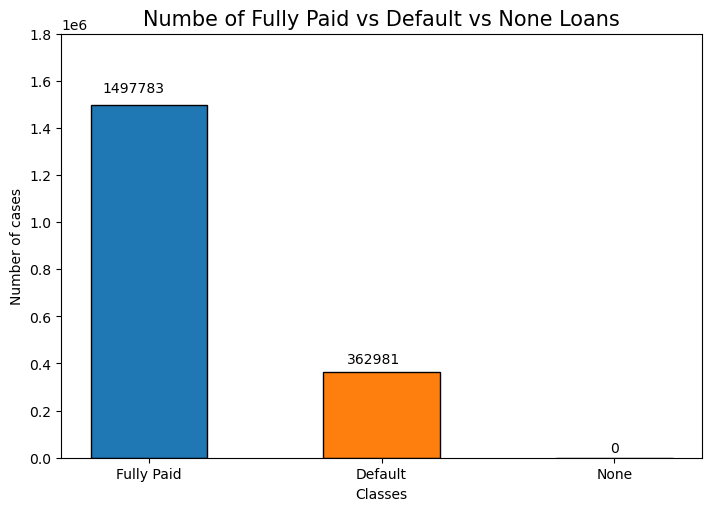

In [20]:
# Visualizing the encoded target

defalut_fully_paid = data['loan_status'].value_counts()
none_ = data['loan_status'].isna().sum()

fig, ax = plt.subplots(figsize=(7,5), layout='constrained')
rects = ax.bar(x=2, height=defalut_fully_paid[0], width=1, label="Fully Paid", edgecolor="black")
rects = ax.bar(x=4, height=defalut_fully_paid[1], width=1, label="Default", edgecolor="black")
rects = ax.bar(x=6, height=none_, width=1, label="None", edgecolor="black", tick_label=None)
ax.bar_label(rects, padding=2)


ax.set_ylabel('Number of cases',size=10)
ax.set_xlabel('Classes',size=10)
ax.set_title('Numbe of Fully Paid vs Default vs None Loans',size=15)

ax.set_xticks([2,4,6], ["Fully Paid","Default","None"])

ax.set_ylim(0, 1800000)

ax.text(1.6,1550000,defalut_fully_paid[0])
ax.text(3.7,400000,defalut_fully_paid[1])
# ax.text(5.6,1150000,none_)

fig.show()

In [ ]:
# We see that the ration of Fully Paid and Default is almost 1 to 4.  (거의 1:4비율이다)
print(f"Ratio of:    (Fully Paid) / Default  : {defalut_fully_paid[0]/defalut_fully_paid[1]}")
print(f"Ratio of:            None / Default  : {none_/defalut_fully_paid[1]}")

Ratio of:    (Fully Paid) / Default  : 4.126339946167981
Ratio of:            None / Default  : 0.0


In [18]:
for col in data.columns:
    print(col, '\n', data[col].unique(), '\n')

Unnamed: 0 
 [     0      1      2 ... 421092 421093 421094] 

id 
 ['1077501' '1077430' '1077175' ... '102628603' '102196576' '99799684'] 

loan_amnt 
 [ 5000.  2500.  2400. ... 37950. 38525. 38550.] 

funded_amnt 
 [ 5000.  2500.  2400. ... 37950. 38525. 38550.] 

funded_amnt_inv 
 [ 4975.          2500.          2400.         ... 31496.16546498
 21595.18110536  9982.00356554] 

term 
 [' 36 months' ' 60 months'] 

int_rate 
 [' 10.65%' ' 15.27%' ' 15.96%' ' 13.49%' ' 12.69%' '  7.90%' ' 18.64%'
 ' 21.28%' ' 14.65%' '  9.91%' ' 16.29%' '  6.03%' ' 11.71%' ' 12.42%'
 ' 14.27%' ' 16.77%' '  7.51%' '  8.90%' ' 18.25%' '  6.62%' ' 19.91%'
 ' 17.27%' ' 17.58%' ' 21.67%' ' 19.42%' ' 22.06%' ' 20.89%' ' 20.30%'
 ' 23.91%' ' 19.03%' ' 23.52%' ' 23.13%' ' 22.74%' ' 22.35%' ' 24.11%'
 '  6.00%' ' 22.11%' '  7.49%' ' 11.99%' '  5.99%' ' 10.99%' '  9.99%'
 ' 18.79%' ' 11.49%' '  8.49%' ' 15.99%' ' 16.49%' '  6.99%' ' 12.99%'
 ' 15.23%' ' 14.79%' '  5.42%' ' 10.59%' ' 17.49%' ' 15.62%' ' 21.36%'
